In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("cardio_train.csv",delimiter=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49961 entries, 0 to 49960
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49961 non-null  int64  
 1   age          49961 non-null  int64  
 2   gender       49961 non-null  int64  
 3   height       49961 non-null  int64  
 4   weight       49961 non-null  float64
 5   ap_hi        49961 non-null  int64  
 6   ap_lo        49961 non-null  int64  
 7   cholesterol  49961 non-null  int64  
 8   gluc         49961 non-null  int64  
 9   smoke        49961 non-null  int64  
 10  alco         49961 non-null  int64  
 11  active       49961 non-null  int64  
 12  cardio       49960 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.0 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49960.000000
mean,35676.161566,19464.684094,1.346971,164.366166,74.230610,128.747183,96.972118,1.363504,1.225856,0.088209,0.053402,0.802626,0.499039
std,20609.537461,2469.041025,0.476011,8.190134,14.327859,154.515534,200.225599,0.677197,0.572023,0.283601,0.224835,0.398021,0.500004
min,0.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17836.000000,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35682.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,53508.000000,21321.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,71310.000000,23690.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         1
dtype: int64

In [8]:
df['age']=round(df['age']/365)

In [9]:
df['age']=df['age'].astype("int")

In [10]:
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
df=df[df['ap_lo']<df['ap_hi']]

In [13]:
#remove abnormal high bp which is less than 80
df=df[df['ap_hi']>80]

In [14]:
#remove abnormal low bp which is less than 50
df=df[df['ap_lo']>50]

In [15]:
#lo bp with higher range
df=df[df['ap_lo']<150]

In [16]:
df=df[df['ap_hi']<250]

In [17]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48908.000000
mean,53.321004,1.346214,164.370566,74.164565,126.725572,81.356458,1.361447,1.225173,0.087980,0.053119,0.802368,0.494561
std,6.768412,0.475767,8.161763,14.252518,16.637136,9.326800,0.676008,0.571343,0.283268,0.224273,0.398217,0.499976
min,30.000000,1.000000,55.000000,11.000000,85.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


EDA

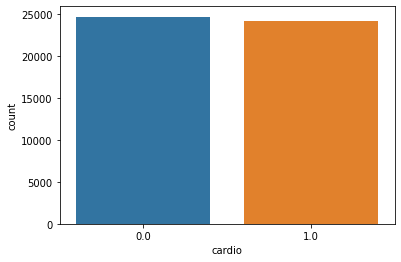

In [18]:
sns.countplot(df['cardio'])

By seeing above chart,we can say that,target variable is balanced.

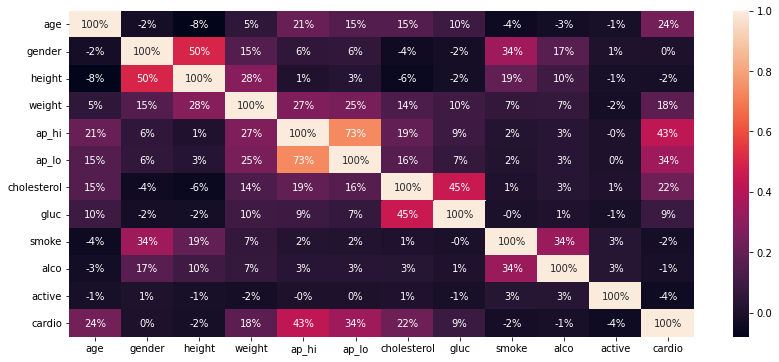

In [19]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

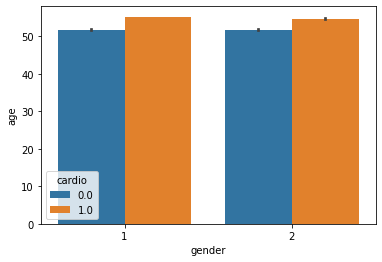

In [20]:
sns.barplot(df['gender'],df['age'],hue=df['cardio'])

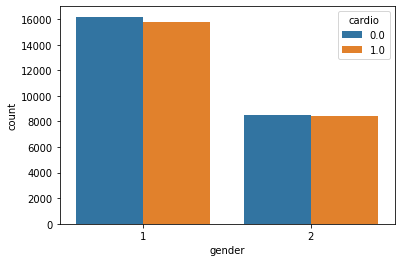

In [21]:
sns.countplot(df['gender'],hue=df['cardio'])

In [22]:
df['height'].describe()


count    48909.000000
mean       164.370566
std          8.161763
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

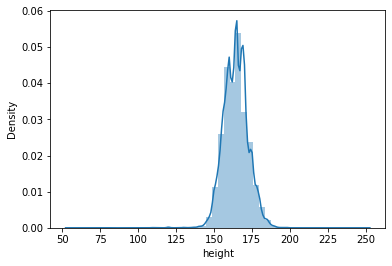

In [23]:
sns.distplot(df['height'],hist=True)
plt.show()

In [24]:
df['weight'].describe()

count    48909.000000
mean        74.164565
std         14.252518
min         11.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

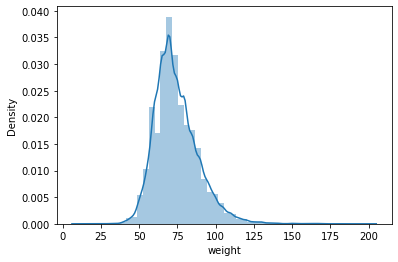

In [25]:
sns.distplot(df['weight'],hist=True)

In [26]:
df.drop(df[df.weight<40].index,inplace=True)

In [27]:
df.reset_index(inplace=True,drop=True)

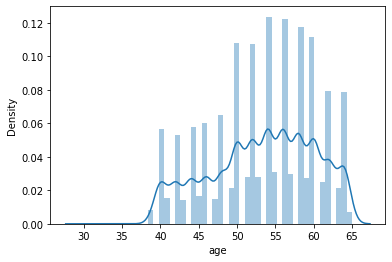

In [28]:

sns.distplot(df['age'],hist=True)

In [29]:
df['cholesterol'].value_counts()

1    36733
2     6613
3     5529
Name: cholesterol, dtype: int64

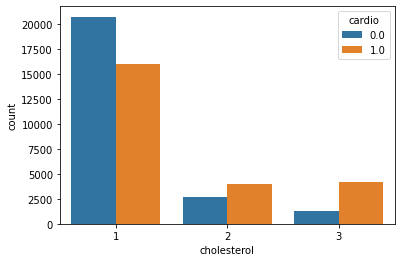

In [30]:
sns.countplot(df['cholesterol'],hue=df['cardio'])

In [31]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [32]:
df['gluc'].value_counts()

1    41585
3     3713
2     3577
Name: gluc, dtype: int64

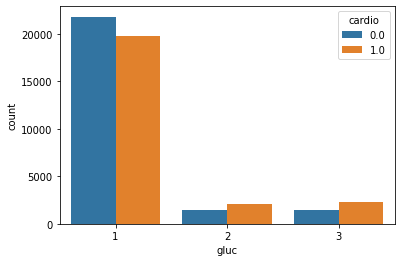

In [33]:
sns.countplot(df['gluc'],hue=df['cardio'])

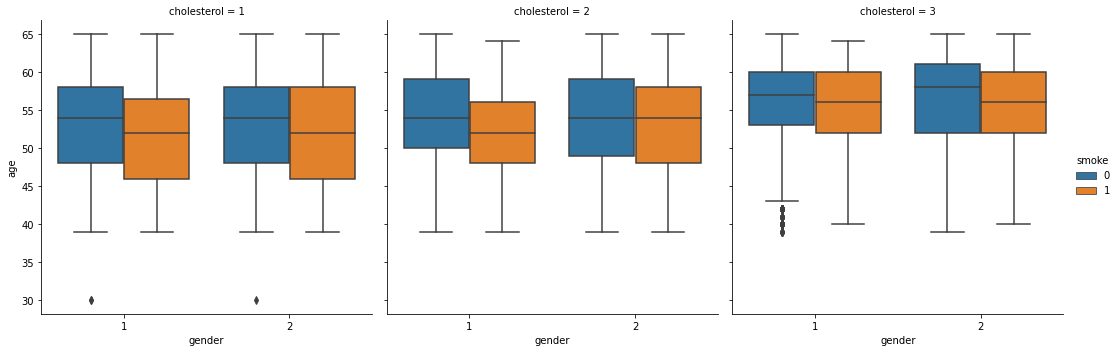

In [34]:
sns.catplot(x='gender',y='age',hue='smoke',col='cholesterol',kind="box",data=df)

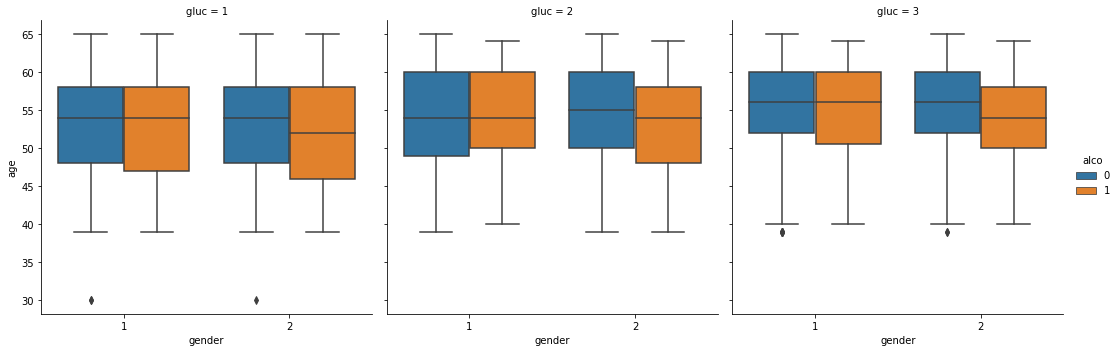

In [35]:
sns.catplot(x='gender',y='age',hue='alco',col='gluc',kind='box',data=df)

In [36]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1.0
2,52,1,165,64.0,130,70,3,1,0,0,0,1.0
3,48,2,169,82.0,150,100,1,1,0,0,1,1.0
4,48,1,156,56.0,100,60,1,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48870,52,2,170,85.0,130,80,1,1,0,0,1,1.0
48871,58,1,158,78.0,140,90,1,1,0,0,1,0.0
48872,44,2,168,72.0,120,80,1,2,1,0,1,0.0
48873,48,1,163,45.0,120,80,1,1,0,0,1,0.0


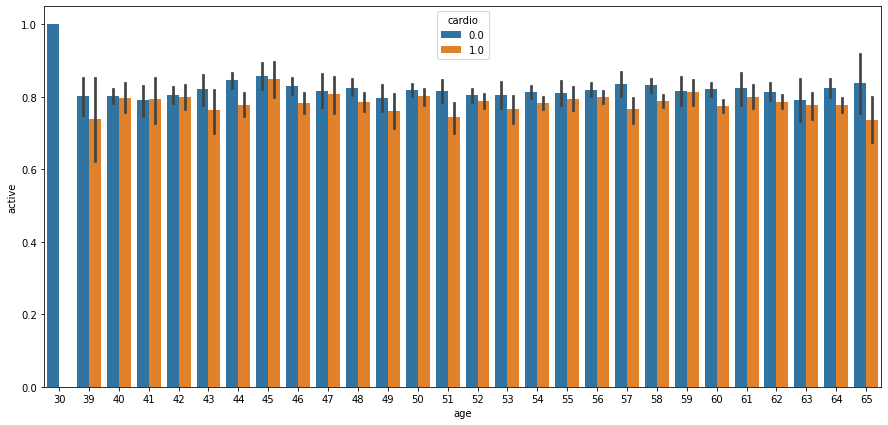

In [37]:
plt.figure(figsize=(15,7))
sns.barplot(df['age'],df['active'],hue=df['cardio'])

In [38]:
col=['gluc','active','smoke','alco','cholesterol']
data=pd.melt(df,id_vars="cardio",value_vars=df[col])

In [39]:
data

,cardio,variable,value
0,0.0,gluc,1
1,1.0,gluc,1
2,1.0,gluc,1
3,1.0,gluc,1
4,0.0,gluc,1
...,...,...,...
244370,1.0,cholesterol,1
244371,0.0,cholesterol,1
244372,0.0,cholesterol,1
244373,0.0,cholesterol,1


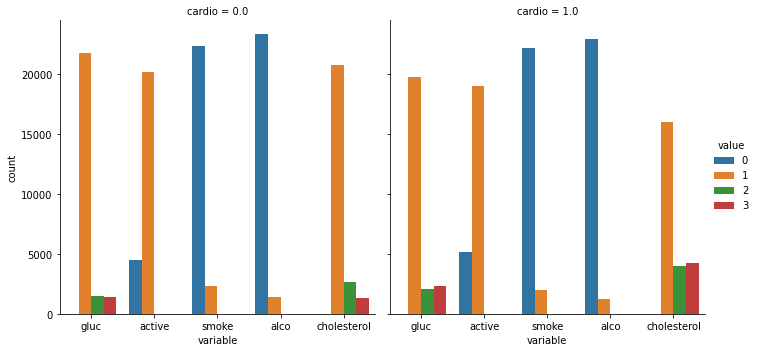

In [40]:
sns.catplot(x='variable',hue='value',col='cardio',kind='count',data=data)

In [41]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         1
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
X=df.iloc[:,:-1]#Independent Variables
y=df.iloc[:,-1]

In [44]:
X.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [45]:
y

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
48869    1.0
48870    1.0
48871    0.0
48872    0.0
48873    0.0
Name: cardio, Length: 48874, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=--123)

In [48]:
X_train.shape

(39099, 11)

In [49]:
X_test.shape

(9775, 11)

In [50]:
y_train.shape

(39099,)

In [51]:
y_test.shape

(9775,)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
se=StandardScaler()

In [54]:
X_train=se.fit_transform(X_train)
X_test=se.fit_transform(X_test)

In [55]:
X_train

array([[ 0.09646967, -0.72656832, -0.04728762, ..., -0.31084256,
        -0.23739961,  0.49740906],
       [ 0.09646967, -0.72656832, -0.53927768, ..., -0.31084256,
        -0.23739961, -2.01041774],
       [ 0.68846023, -0.72656832, -1.03126774, ..., -0.31084256,
        -0.23739961,  0.49740906],
       ...,
       [-0.49552088, -0.72656832,  0.32170493, ..., -0.31084256,
        -0.23739961,  0.49740906],
       [ 0.98445551, -0.72656832, -0.53927768, ..., -0.31084256,
        -0.23739961,  0.49740906],
       [ 0.68846023, -0.72656832, -1.27726277, ..., -0.31084256,
        -0.23739961,  0.49740906]])

In [56]:
X_test

array([[ 0.40941706, -0.73359316,  0.0773615 , ..., -0.30979814,
        -0.23486115, -2.03055796],
       [-0.76502314, -0.73359316, -0.52993744, ..., -0.30979814,
        -0.23486115,  0.49247548],
       [ 1.29024721, -0.73359316, -0.04409829, ..., -0.30979814,
        -0.23486115,  0.49247548],
       ...,
       [-1.35224324, -0.73359316, -0.77285701, ...,  3.22790838,
        -0.23486115,  0.49247548],
       [-0.17780304,  1.36315338,  1.04903979, ..., -0.30979814,
        -0.23486115,  0.49247548],
       [ 1.29024721, -0.73359316,  0.56320064, ..., -0.30979814,
        -0.23486115,  0.49247548]])

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf=LogisticRegression()

In [59]:
clf.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [61]:
y_train_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
y_test_pred

array([1., 0., 1., ..., 0., 0., 0.])

In [63]:
from sklearn import metrics

In [64]:
print("Train Data")
accuracy=metrics.accuracy_score(y_train,y_train_pred)
print(accuracy)
print("test Data")
accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
print(accuracy_test)

Train Data
0.7280748868257501
test Data
0.7301278772378517


In [65]:
train_proba=clf.predict_proba(X_train)

In [66]:
train_proba

array([[0.00979223, 0.99020777],
       [0.20430816, 0.79569184],
       [0.27700967, 0.72299033],
       ...,
       [0.34250646, 0.65749354],
       [0.12799636, 0.87200364],
       [0.48739166, 0.51260834]])

In [67]:
train_proba[:,1]

array([0.99020777, 0.79569184, 0.72299033, ..., 0.65749354, 0.87200364,
       0.51260834])

In [68]:
train_proba[:,0]

array([0.00979223, 0.20430816, 0.27700967, ..., 0.34250646, 0.12799636,
       0.48739166])

In [69]:
test_proba=clf.predict_proba(X_test)

In [70]:
test_proba[:,1]

array([0.62717352, 0.18769855, 0.55088167, ..., 0.24567087, 0.14947388,
       0.32811405])

In [71]:
print("Train Data")
train_recall=metrics.recall_score(y_train,y_train_pred)
print(train_recall)
print("test Data")
test_recall=metrics.recall_score(y_test,y_test_pred)
print(test_recall)

Train Data
0.6657358568621368
test Data
0.665702479338843


In [72]:
print("Train Data")
train_precision=metrics.precision_score(y_train,y_train_pred)
print(train_precision)
print("test Data")
test_precision=metrics.precision_score(y_test,y_test_pred)
print(test_precision)

Train Data
0.75542776669405
test Data
0.7595473833097596


In [73]:
class_weight=['None','balanced']
c=[0.1,0.001,1,10,100,0.01,1000]
param_grid=dict(C=c,class_weight=class_weight)

In [74]:
param_grid

{'C': [0.1, 0.001, 1, 10, 100, 0.01, 1000],
 'class_weight': ['None', 'balanced']}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid=GridSearchCV(clf,param_grid=param_grid,scoring='recall',n_jobs=-1,cv=3)
grid_result=grid.fit(X_train,y_train)

In [77]:
grid_result.best_params_

{'C': 0.01, 'class_weight': 'balanced'}

In [78]:
grid_result.best_score_

0.6723032371496535

In [79]:
model=LogisticRegression(C=0.01,class_weight='balanced')

In [80]:
model.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [81]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [82]:
print("Train Data")
train_recall=metrics.recall_score(y_train,y_pred_train)
print(train_recall)
print("test Data")
test_recall=metrics.recall_score(y_test,y_pred_test)
print(test_recall)


Train Data
0.6721998138380391
test Data
0.6745867768595041


In [85]:
train_proba=model.predict_proba(X_train)[:,1]
test_proba=model.predict_proba(X_test)[:,1]

In [115]:
from sklearn import metrics
def classification_metrics(y_actual,y_proba,threshold):
  y_pred_temp=[1 if p>threshold else 0 for p in y_proba]
  accuracy=metrics.accuracy_score(y_actual,y_pred_temp)
  precision=metrics.precision_score(y_actual,y_pred_temp)
  recall =metrics.recall_score(y_actual,y_pred_temp)
  f1_score=metrics.f1_score(y_actual,y_pred_temp)
  roc_auc=metrics.roc_auc_score(y_actual,y_proba)
  return {"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1_score,"ROC_AUC":roc_auc}

In [116]:
print("Train Data")
classification_metrics(y_train,train_proba,0.46)

Train Data


{'Accuracy': 0.7271285710631985,
 'Precision': 0.724643690075149,
 'Recall': 0.7230323714965353,
 'F1-score': 0.7238371340563767,
 'ROC_AUC': 0.7902448623968827}

In [117]:
print("Test Data")
classification_metrics(y_test,test_proba,0.46)

Test Data


{'Accuracy': 0.7349360613810741,
 'Precision': 0.7312358626362327,
 'Recall': 0.7347107438016529,
 'F1-score': 0.7329691847882098,
 'ROC_AUC': 0.798563118055381}

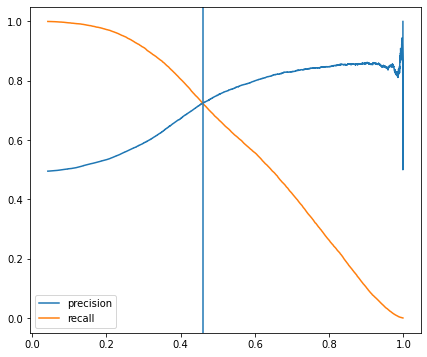

In [111]:
p,r,th=metrics.precision_recall_curve(y_train,train_proba)
plt.figure(figsize=(7,6))
sns.lineplot(x=th,y=p[:-1],label="precision")
sns.lineplot(x=th,y=r[:-1],label='recall')
plt.axvline(0.46)
plt.show()


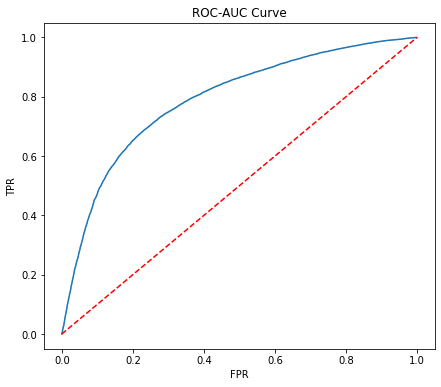

In [102]:
fpr,tpr,th=metrics.roc_curve(y_train,train_proba)
plt.figure(figsize=(7,6))
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color='red',linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.show()


In [118]:
metrics.confusion_matrix(y_train,y_pred_train)                                                                                                                

array([[15464,  4297],
       [ 6339, 12999]])

In [119]:
metrics.confusion_matrix(y_test,y_pred_test)     

array([[3883, 1052],
       [1575, 3265]])

In [121]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74     19761
         1.0       0.75      0.67      0.71     19338

    accuracy                           0.73     39099
   macro avg       0.73      0.73      0.73     39099
weighted avg       0.73      0.73      0.73     39099



In [122]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      4935
         1.0       0.76      0.67      0.71      4840

    accuracy                           0.73      9775
   macro avg       0.73      0.73      0.73      9775
weighted avg       0.73      0.73      0.73      9775

